In [1]:
import numpy as np
import random

from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)


In [2]:
X_train = np.load("../data/X_train.npy")
X_test  = np.load("../data/X_test.npy")
y_train = np.load("../data/y_train.npy")
y_test  = np.load("../data/y_test.npy")

X_train.shape


(398, 30)

In [3]:
EPOCHS = 3000
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
DROPOUT_RATE = 0.5


In [4]:
mlp_model = models.Sequential([
    layers.Input(shape=(30,)),
    layers.Dense(128, activation="relu"),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(64, activation="relu"),
    layers.Dropout(DROPOUT_RATE),
    layers.Dense(1, activation="sigmoid")
])

mlp_model.compile(
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

mlp_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = mlp_model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    verbose=0
)

print("MLP training finished")


MLP training finished


In [6]:
y_pred_prob = mlp_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [7]:
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print("MLP Results")
print("Accuracy:", accuracy)
print("TPR:", TPR)
print("TNR:", TNR)
print("FPR:", FPR)
print("FNR:", FNR)
print("Confusion Matrix:\n", cm)


MLP Results
Accuracy: 0.9707602339181286
TPR: 0.9626168224299065
TNR: 0.984375
FPR: 0.015625
FNR: 0.037383177570093455
Confusion Matrix:
 [[ 63   1]
 [  4 103]]


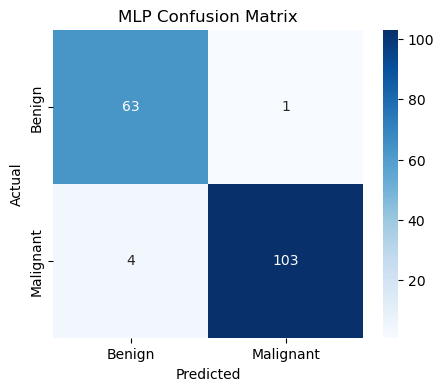

In [8]:
plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Benign","Malignant"],
    yticklabels=["Benign","Malignant"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP Confusion Matrix")
plt.show()


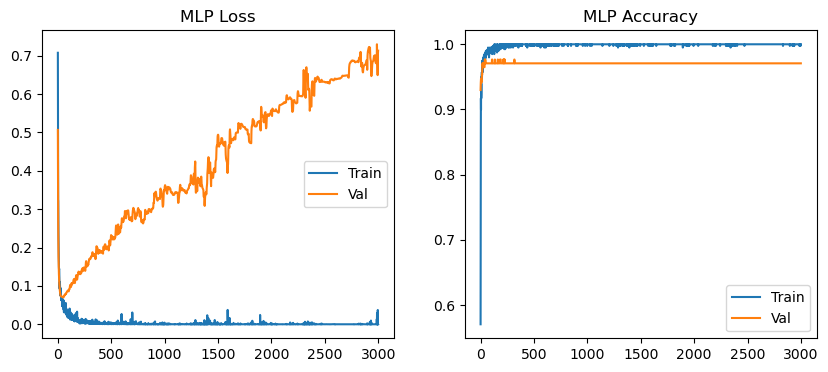

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("MLP Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("MLP Accuracy")
plt.legend()

plt.show()


In [10]:
mlp_model.save("../saved_models/mlp.h5")
print("MLP model saved")


MLP model saved
